In [35]:
#Import libraries
from sklearn.preprocessing import OneHotEncoder
import sklearn
import plotly as py
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Normalizer
import warnings
warnings.simplefilter(action='ignore')

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [36]:
train=pd.read_csv("bank.csv",sep=';')

In [37]:
print(train.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [38]:
print(train.describe())

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [39]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [40]:
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [41]:
train.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [42]:
train['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [43]:
countNo = len(train[train.y == 'no'])
countYes = len(train[train.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(train.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(train.y))*100)))

Percentage of "No": 88.476%
Percentage of "Yes": 11.524%


In [44]:
# To check how many columns have missing values 
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

In [45]:
train[show_missing()].isnull().sum()#No missing Values

Series([], dtype: float64)

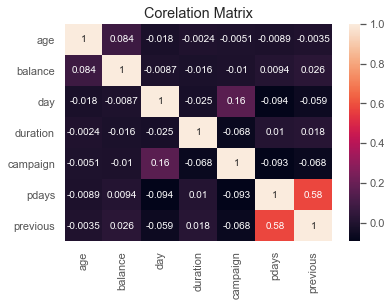

In [46]:
#Correlation
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

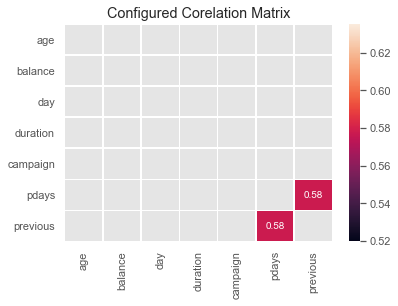

In [47]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

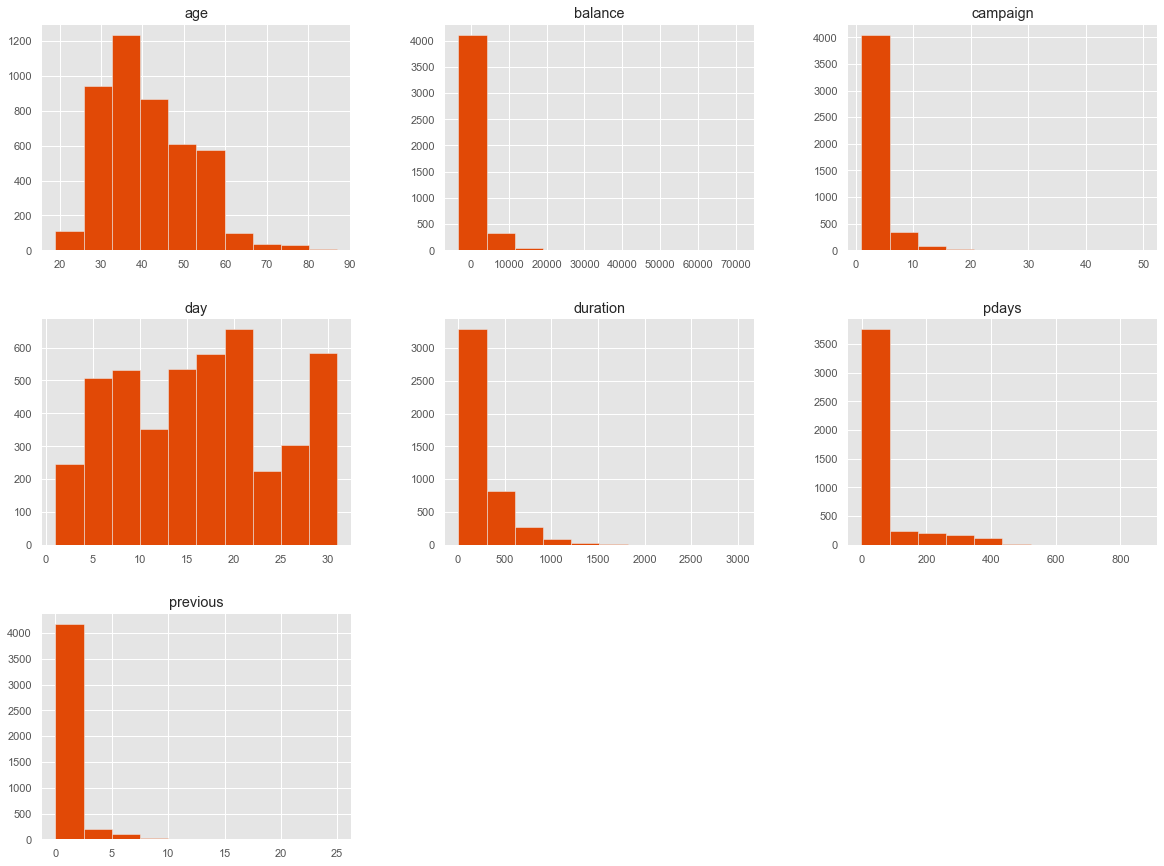

In [48]:
# Let's see how the numeric data is distributed.
train.hist(bins=10, figsize=(20,15), color='#E14906')
plt.show()

Text(0, 0.5, 'mean durations')

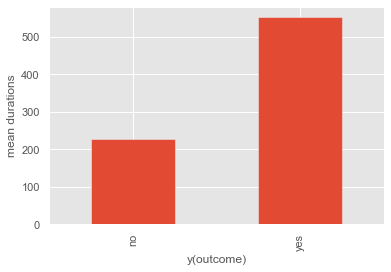

In [49]:
ax = train.groupby('y').duration.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean durations")
#mean duration for subscribing is higher than non-subscribing

Text(0, 0.5, 'mean ages')

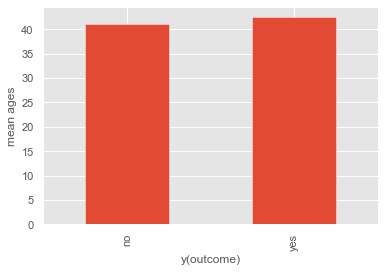

In [50]:
ax = train.groupby('y').age.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean ages")

Text(0, 0.5, 'mean previous')

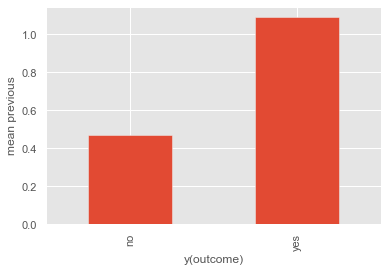

In [51]:
ax = train.groupby('y').previous.mean().plot(kind='bar')
ax.set_xlabel("y(outcome)")
ax.set_ylabel("mean previous")

In [52]:
# Binning of Age
lst = [train]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
train['age_category'] = train['age_category'].astype(np.int64)
train.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
y               object
age_category     int64
dtype: object

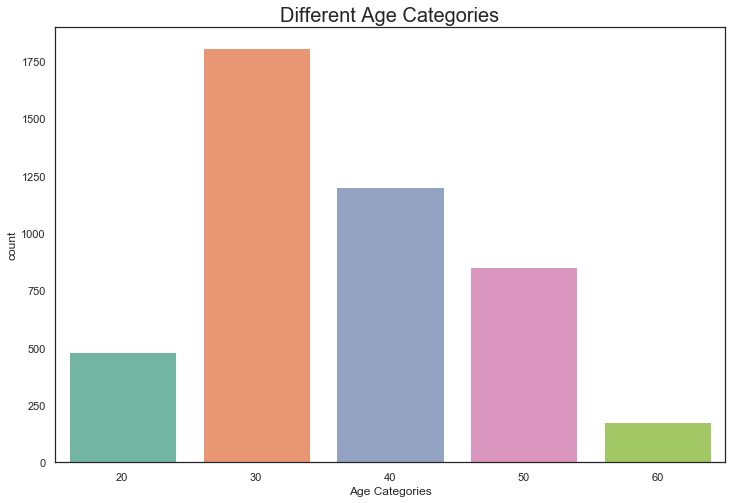

In [53]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="age_category", data=train, palette="Set2")
ax.set_title("Different Age Categories", fontsize=20)
ax.set_xlabel("Age Categories")
plt.show()

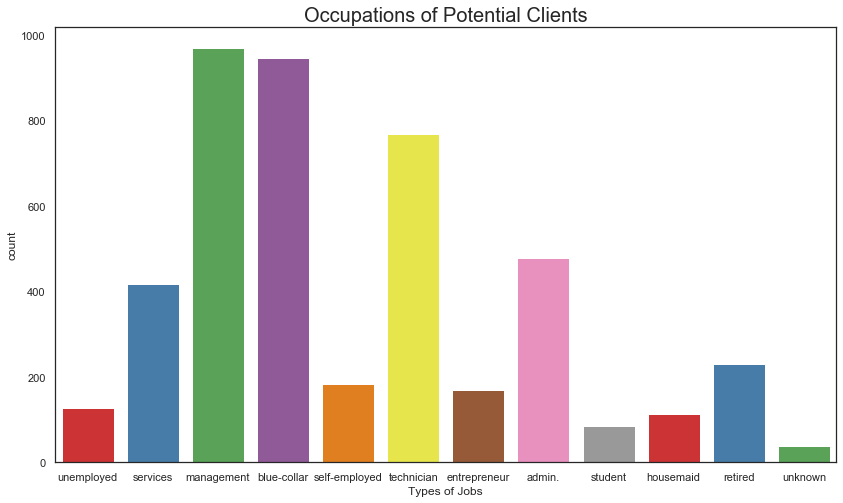

In [54]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(x="job", data=train, palette="Set1")
ax.set_title("Occupations of Potential Clients", fontsize=20)
ax.set_xlabel("Types of Jobs")
plt.show()

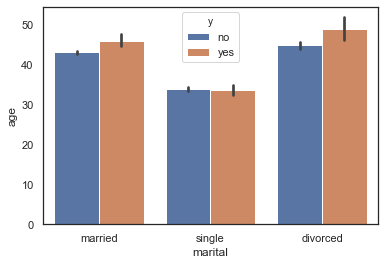

In [55]:
sns.barplot('marital','age',hue='y',data=train )


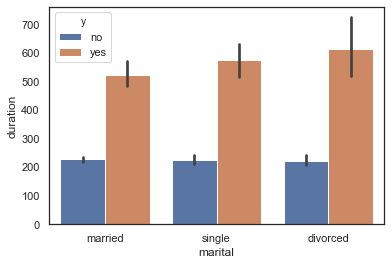

In [56]:
sns.barplot('marital','duration',hue='y',data=train )

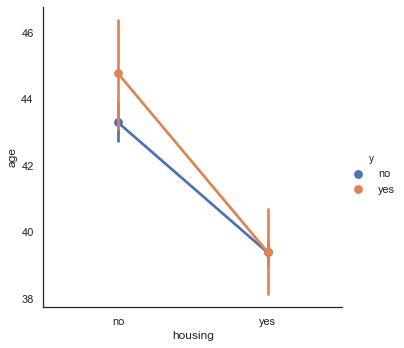

In [57]:
sns.factorplot('housing','age',hue='y',data=train )

In [58]:
#Categorical Variables
categorical_data=train.select_dtypes(exclude=np.number)
categorical_cols=train.columns
print("Categorical features :")
print(categorical_data.head())
print("===="*20)

Categorical features :
           job  marital  education default housing loan   contact month  \
0   unemployed  married    primary      no      no   no  cellular   oct   
1     services  married  secondary      no     yes  yes  cellular   may   
2   management   single   tertiary      no     yes   no  cellular   apr   
3   management  married   tertiary      no     yes  yes   unknown   jun   
4  blue-collar  married  secondary      no     yes   no   unknown   may   

  poutcome   y  
0  unknown  no  
1  failure  no  
2  failure  no  
3  unknown  no  
4  unknown  no  


In [59]:
train['duration'].describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

In [60]:
#Feature Engineering on Duration Data
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(train);

In [61]:
#Feature engineering
train['poutcome'] = train['poutcome'].replace(['other'] , 'failure')
train['poutcome'] = train['poutcome'].replace(['unknown'] , 'failure')
train.poutcome.value_counts()

failure    4392
success     129
Name: poutcome, dtype: int64

In [62]:
# Combine similar jobs into categiroes
train['job'] = train['job'].replace(['management', 'admin.'], 'admin/manag')
train['job'] = train['job'].replace(['services','housemaid'], 'home/service')
train['job'] = train['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'unemployed')

In [63]:
#Label Encoding
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month','poutcome','y']
train[encoding_list] = train[encoding_list].apply(LabelEncoder().fit_transform)

In [64]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_category'],
      dtype='object')

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'age_category'] 
X = train[cols]
y = train['y']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model,8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['education', 'default', 'housing', 'loan', 'contact', 'duration', 'previous', 'poutcome']


Optimal number of features: 11
Selected features: ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'age_category']


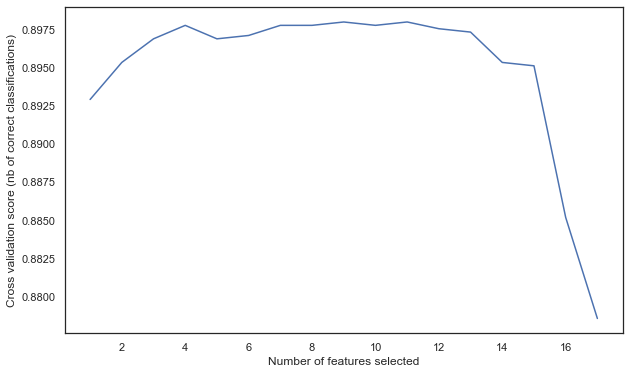

In [66]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

['education', 'default', 'housing', 'loan', 'contact', 'duration', 'previous', 'poutcome', 'y']
Index(['education', 'default', 'housing', 'loan', 'contact', 'duration',
       'previous', 'poutcome', 'y'],
      dtype='object')


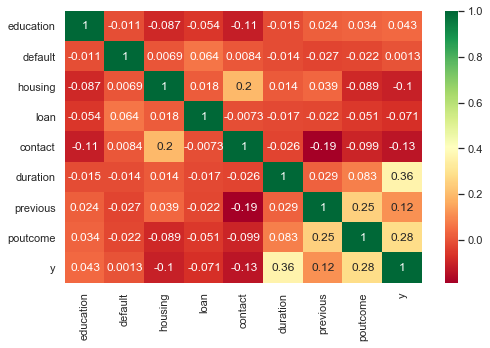

In [67]:
Selected_features=list(X.columns[rfe.support_])
Selected_features.append('y')
print(Selected_features)
final_train=train[Selected_features]
print(final_train.columns)
plt.subplots(figsize=(8, 5))
sns.heatmap(final_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train.drop(['y'], axis=1), final_train['y'], test_size = 0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
logreg = clf.fit(X, y)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.intercept_)
print(logreg.coef_)
coef1 = pd.Series(logreg.coef_.ravel(), list(X_train.columns)).sort_values()
print(coef1)
coef1.plot(kind='bar', title='Model Coefficients',figsize=(16,8),color='saddlebrown')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

idx = np.min(np.where(tpr > 0.8)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

NameError: name 'GridSearchCV' is not defined

In [37]:
# Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [38]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

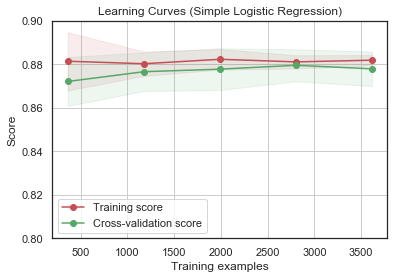

In [39]:
title = "Learning Curves (Simple Logistic Regression)"
cv = ShuffleSplit(n_splits=15, test_size=0.20, random_state=0)
estimator = logreg
plot_learning_curve(estimator, title, X, y, (0.80,0.90), cv=cv, n_jobs=10)

plt.show()

In [40]:
# KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
print(knn_mean)

0.8838502278831752


In [41]:
#Things to try
# 1.Grid Search for optimal value of C in Logistic Regression and K  in KNearestNeighbour
# 2.Different Feature Selection and Engineering Methods
# 3.Cross-Validation
# IMBALANCED DATASET FIX